# Linear Regression

🎯 In this exercise, you will model the performance of a NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
import seaborn as sns

In [2]:
data = pd.read_csv('./data/NBA.csv')
data.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define the feature set and target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` the target.

In [3]:
code_data = data[['mp', 'win_rating']]
code_data.head()

,mp,win_rating
0,2409,1.643091
1,2708,10.808427
2,2407,3.054773
3,585,0.230004
4,2056,0.905614


In [4]:
X = code_data[['mp']] 
y = code_data[['win_rating']]

👇 In a scatter plot ([doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) , visualize the relationship between the rating and the minutes played.

In [5]:
model = LinearRegression()

In [6]:
data

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614
...,...,...,...,...,...,...
3995,1986,1224,565,-1.761425,-0.011698,0.082828
3996,1994,3564,1785,0.907199,-0.125856,3.542416
3997,1998,706,378,0.848178,0.694183,0.787185
3998,2003,289,156,-6.298906,0.205844,-0.312601


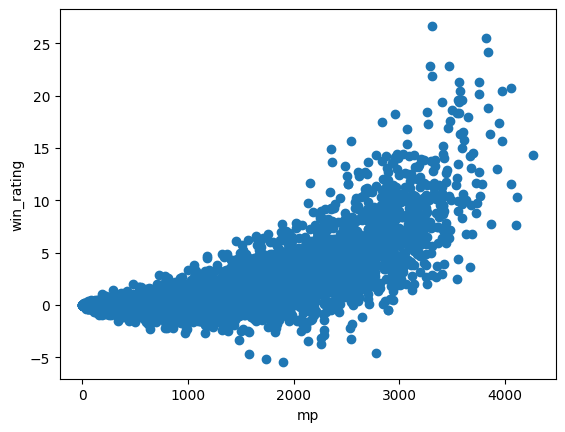

In [7]:
plt.scatter(data['mp'], data['win_rating'])
plt.xlabel('mp')
plt.ylabel('win_rating')
plt.show();

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-validation

👇 Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)), run a 5-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting the player performance rating from minutes played. Save the raw output of the cross validation under a new variable `cv_results`.

In [8]:
cv_results = cross_validate(model, X, y, cv=5)
cv_results

{'fit_time': array([0.00222778, 0.00102711, 0.00095987, 0.00089979, 0.00090289]),
 'score_time': array([0.00075102, 0.00067902, 0.00062704, 0.00062799, 0.00064802]),
 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762])}

❓ What is the lowest score of the cross validation? Compute your answer and save the value under new variable `min_score`.

In [9]:
min_score = cv_results['test_score'].min()
min_score

0.5344790822272503

❓ What is the highest score of the cross validation?  Compute your answer and save the value under new variable `max_score`.

In [10]:
max_score = cv_results['test_score'].max()
max_score

0.5791776193355005

❓ What is the mean score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [11]:
mean_score = cv_results['test_score'].mean()
mean_score

0.5567301800068911

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('cv_results',
                         cv_result = cv_results,
                         mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/damlacidamkartal/.pyenv/versions/3.10.6/bin/python3
cachedir: .pytest_cache
rootdir: /Users/damlacidamkartal/code/cidamla/data-linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as K folds increases from 2 until 20.

In [13]:
X = code_data[['mp']] 
y = code_data[['win_rating']]

In [14]:
K = list(range(2,21))
total_time = []
mean_scores = []

for i in range(2,21):
    datas = cross_validate(model, X, y, cv=i)
    time = sum(datas['fit_time']) + sum(datas['score_time'])
    mean = datas['test_score'].mean()
    mean_scores.append(mean)
    total_time.append(time)
total_time

[0.004017353057861328,
 0.004320621490478516,
 0.00611424446105957,
 0.007009029388427734,
 0.008428812026977539,
 0.009516239166259766,
 0.010746240615844727,
 0.012118101119995117,
 0.013382196426391602,
 0.014687061309814453,
 0.01700425148010254,
 0.01810932159423828,
 0.018775224685668945,
 0.020023107528686523,
 0.02174067497253418,
 0.02284860610961914,
 0.023996591567993164,
 0.025207996368408203,
 0.026485443115234375]

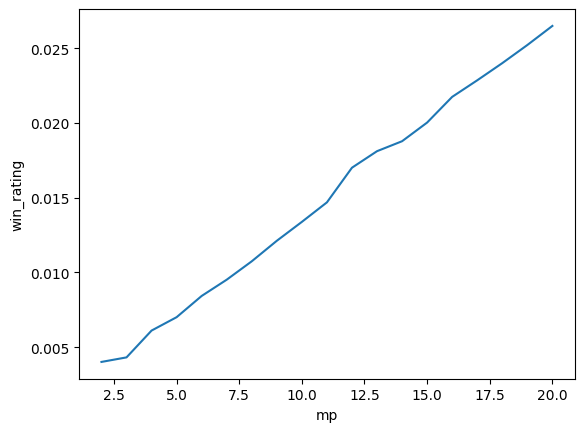

In [15]:
plt.plot(K, total_time)
plt.xlabel('mp')
plt.ylabel('win_rating')
plt.show();

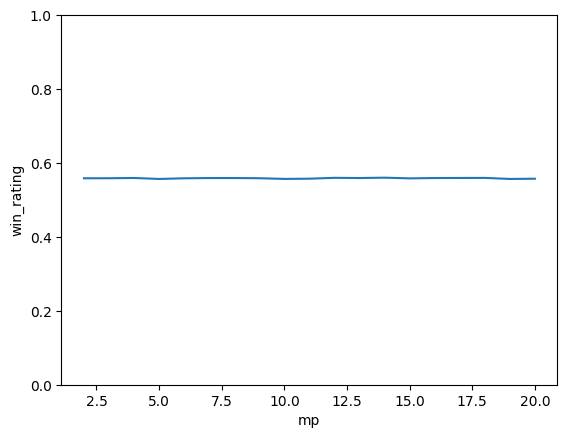

In [16]:
plt.plot(K, mean_scores)
plt.xlabel('mp')
plt.ylim(0, 1)
plt.ylabel('win_rating')
plt.show();

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the model

Cross validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation. 

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict!). Save the trained model under the variable `model`.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
LinearRegression()
model = model.fit(X_train, y_train)

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under variable name `slope`.

In [18]:
model.coef_[0][0]
slope = 0.002591897775387833


❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under variable name `intercept`.

In [19]:
model.intercept_[0]
intercept = - 1.5462420554953558

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [20]:
from nbresult import ChallengeResult

result = ChallengeResult('trained_model',
                         slope = slope,
                         intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/damlacidamkartal/.pyenv/versions/3.10.6/bin/python3
cachedir: .pytest_cache
rootdir: /Users/damlacidamkartal/code/cidamla/data-linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted price in a variable called `prediction`.

In [21]:
prediction = model.predict([[1000]])[0]

/Users/damlacidamkartal/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### ☑️ Test your code

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/damlacidamkartal/.pyenv/versions/3.10.6/bin/python3
cachedir: .pytest_cache
rootdir: /Users/damlacidamkartal/code/cidamla/data-linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the model with more features

Your friend who enjoys NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

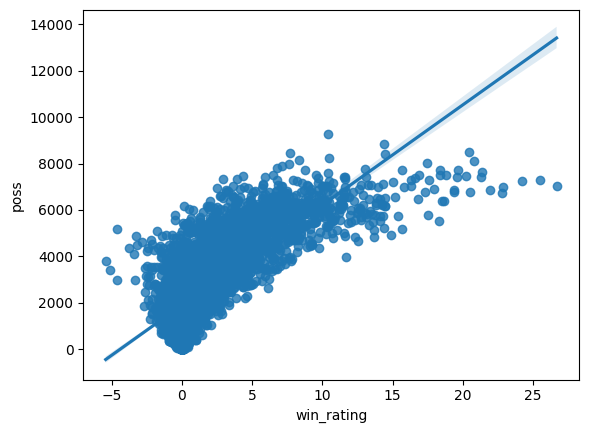

In [23]:
sns.regplot(x=data['win_rating'], y=data['poss'], data=data);

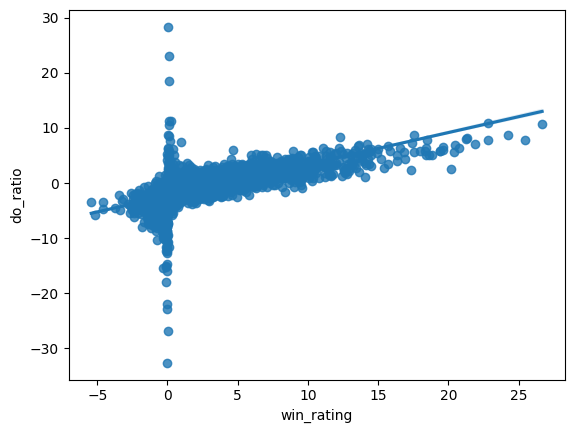

In [24]:
sns.regplot(x=data['win_rating'], y=data['do_ratio'], data=data);

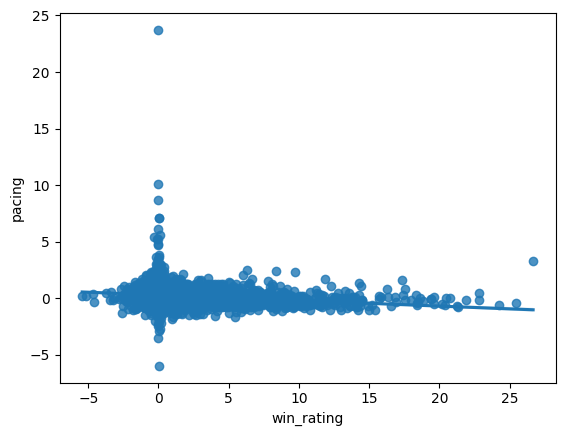

In [25]:
sns.regplot(x=data['win_rating'], y=data['pacing'], data=data);

In [26]:
data.head(5)

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [27]:
new_data = data[['mp', 'poss']]


❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [28]:
X = new_data[['mp']] 
y = new_data[['poss']]

In [29]:
cv_results = cross_validate(model, X, y, cv=5)
cv_results


{'fit_time': array([0.00267315, 0.00098991, 0.00089788, 0.00087404, 0.00086212]),
 'score_time': array([0.00076818, 0.00062799, 0.00059891, 0.00059414, 0.00059199]),
 'test_score': array([0.98900612, 0.99042116, 0.99012932, 0.99179538, 0.99174791])}

In [30]:
mean_2_feat_score = cv_results['test_score'].mean()

### ☑️ Test your code

In [31]:
from nbresult import ChallengeResult

result = ChallengeResult('improved_score',
                         improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/damlacidamkartal/.pyenv/versions/3.10.6/bin/python3
cachedir: .pytest_cache
rootdir: /Users/damlacidamkartal/code/cidamla/data-linear-regression/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



You should see an **increase of around 8%** to your $R^2$ 👏

Congrats you just performed your first manual *feature selection* - we'll see more ways to do that this week!